<a href="https://colab.research.google.com/github/harisdesai/DeepLearning/blob/main/Demo03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
pip install tensorflow


Final Training Accuracy: 99.0 %


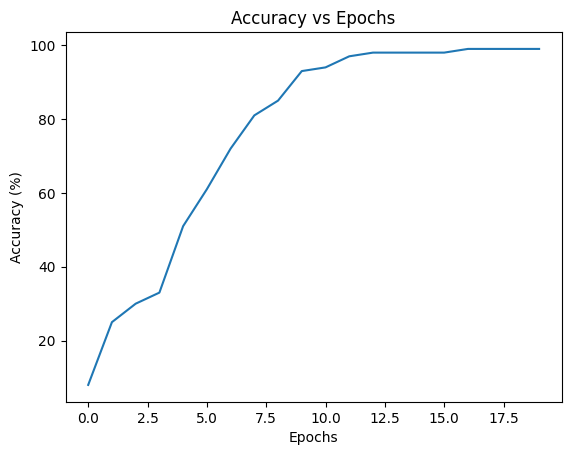

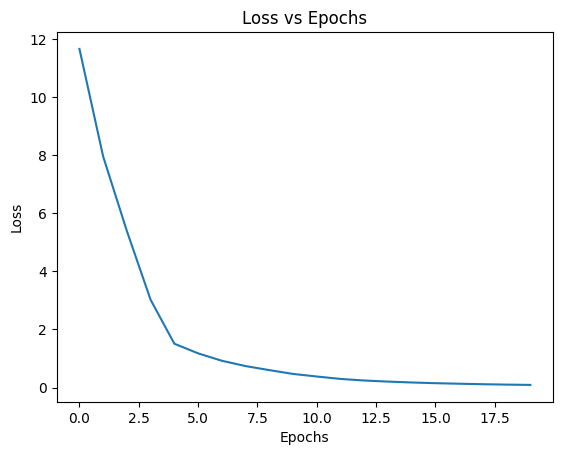

In [44]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt   # <<< added

np.random.seed(42)

# ---------- Load MNIST ----------
(X,Y),(Xt,Yt)=mnist.load_data()

X=X.reshape(-1,784)/255.0

# SMALL DATA → overfitting
X=X[:100]
Y=Y[:100]

# One-hot
def onehot(y):
    o=np.zeros((y.size,10))
    o[np.arange(y.size),y]=1
    return o

Y_oh=onehot(Y)

# ---------- Network ----------
layers=3
sizes=[784,512,64,10]

weights=[]
biases=[]

for i in range(layers):
    weights.append(np.random.randn(sizes[i],sizes[i+1])*0.2)
    biases.append(np.zeros((1,sizes[i+1])))

# ---------- Functions ----------
def relu(x): return np.maximum(0,x)

def softmax(x):
    e=np.exp(x-np.max(x,axis=1,keepdims=True))
    return e/np.sum(e,axis=1,keepdims=True)

def loss(y,yh):
    return -np.mean(np.sum(y*np.log(yh+1e-8),axis=1))

# ---------- Forward ----------
def forward(x):
    acts=[x]; pre=[]

    for i in range(layers):
        z=acts[-1]@weights[i]+biases[i]
        pre.append(z)

        if i==layers-1:
            a=softmax(z)
        else:
            a=relu(z)

        acts.append(a)

    return acts,pre

# ---------- Backward ----------
def backward(acts,pre,y):
    gw=[]; gb=[]
    dz=acts[-1]-y

    for i in reversed(range(layers)):
        dw=acts[i].T@dz/acts[i].shape[0]
        db=dz.mean(0,keepdims=True)

        gw.insert(0,dw)
        gb.insert(0,db)

        if i>0:
            dz=(dz@weights[i].T)*(pre[i-1]>0)

    return gw,gb

# ---------- Graph storage (added) ----------
acc_list=[]
loss_list=[]

# ---------- Train ----------
def train(ep=20,lr=0.15):
    for e in range(ep):
        acts,pre=forward(X)
        gw,gb=backward(acts,pre,Y_oh)

        for i in range(layers):
            weights[i]-=lr*gw[i]
            biases[i]-=lr*gb[i]

        pred=np.argmax(acts[-1],1)
        acc=(pred==Y).mean()*100
        acc_list.append(acc)                 # <<< added
        loss_list.append(loss(Y_oh,acts[-1]))# <<< added

train()

# ---------- Final Accuracy ----------
acts,_=forward(X)
pred=np.argmax(acts[-1],1)
acc=(pred==Y).mean()*100

print("\nFinal Training Accuracy:",acc,"%")

# ---------- Plot Graphs (added) ----------
plt.plot(acc_list)
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy vs Epochs")
plt.show()

plt.plot(loss_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.show()


**BATCH NORMALIZATION**


Final Training Accuracy: 99.0 %


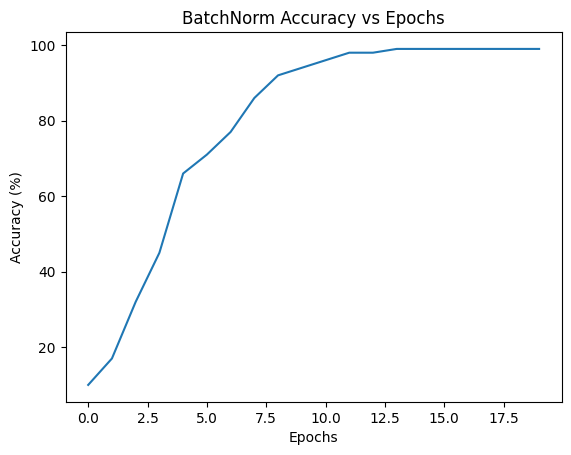

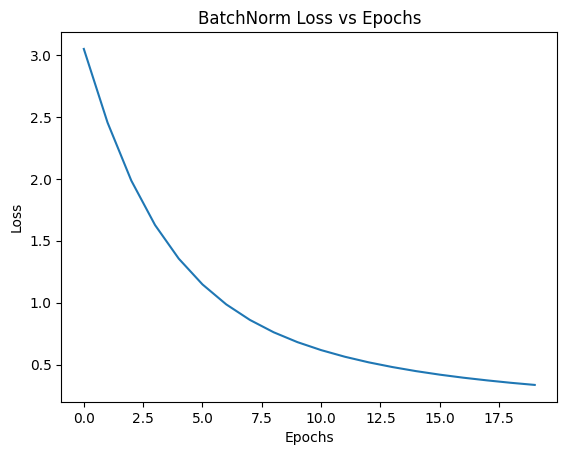

In [45]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt   # <<< added

np.random.seed(42)

# ---------- Load MNIST ----------
(X,Y),(Xt,Yt)=mnist.load_data()
X=X.reshape(-1,784)/255.0

# Small data → overfitting study
X=X[:100]
Y=Y[:100]

# One-hot
def onehot(y):
    o=np.zeros((y.size,10))
    o[np.arange(y.size),y]=1
    return o

Y_oh=onehot(Y)

# ---------- Network ----------
layers=3
sizes=[784,512,64,10]

weights=[]
biases=[]
gamma=[]
beta=[]

for i in range(layers):
    weights.append(np.random.randn(sizes[i],sizes[i+1])*0.2)
    biases.append(np.zeros((1,sizes[i+1])))
    gamma.append(np.ones((1,sizes[i+1])))
    beta.append(np.zeros((1,sizes[i+1])))

eps=1e-5

# ---------- Functions ----------
def relu(x): return np.maximum(0,x)

def softmax(x):
    e=np.exp(x-np.max(x,axis=1,keepdims=True))
    return e/np.sum(e,axis=1,keepdims=True)

def loss(y,yh):   # <<< added
    return -np.mean(np.sum(y*np.log(yh+1e-8),axis=1))

# ---------- BatchNorm ----------
def batchnorm(z,i):
    mu=z.mean(axis=0,keepdims=True)
    var=z.var(axis=0,keepdims=True)
    z_norm=(z-mu)/np.sqrt(var+eps)
    return gamma[i]*z_norm+beta[i]

# ---------- Forward ----------
def forward(x):
    acts=[x]; pre=[]

    for i in range(layers):
        z=acts[-1]@weights[i]+biases[i]

        if i<layers-1:
            z=batchnorm(z,i)

        pre.append(z)

        if i==layers-1:
            a=softmax(z)
        else:
            a=relu(z)

        acts.append(a)

    return acts,pre

# ---------- Backward ----------
def backward(acts,pre,y):
    gw=[]; gb=[]
    dz=acts[-1]-y

    for i in reversed(range(layers)):
        dw=acts[i].T@dz/acts[i].shape[0]
        db=dz.mean(0,keepdims=True)

        gw.insert(0,dw)
        gb.insert(0,db)

        if i>0:
            dz=(dz@weights[i].T)*(pre[i-1]>0)

    return gw,gb

# ---------- Graph storage (added) ----------
acc_list=[]
loss_list=[]

# ---------- Train ----------
def train(ep=20,lr=0.1):
    for e in range(ep):
        acts,pre=forward(X)
        gw,gb=backward(acts,pre,Y_oh)

        for i in range(layers):
            weights[i]-=lr*gw[i]
            biases[i]-=lr*gb[i]

        pred=np.argmax(acts[-1],1)
        acc=(pred==Y).mean()*100
        acc_list.append(acc)                 # <<< added
        loss_list.append(loss(Y_oh,acts[-1]))# <<< added

train()

# ---------- Final Accuracy ----------
acts,_=forward(X)
pred=np.argmax(acts[-1],1)
acc=(pred==Y).mean()*100

print("\nFinal Training Accuracy:",acc,"%")

# ---------- Graphs (added) ----------
plt.plot(acc_list)
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("BatchNorm Accuracy vs Epochs")
plt.show()

plt.plot(loss_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("BatchNorm Loss vs Epochs")
plt.show()


**L2 REGULARIZATION**


Final Training Accuracy: 94.0 %


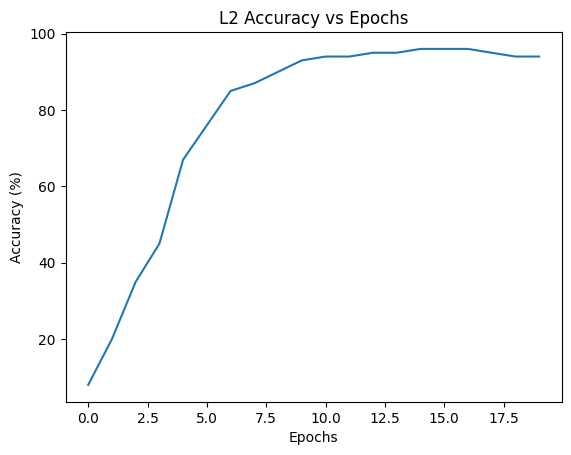

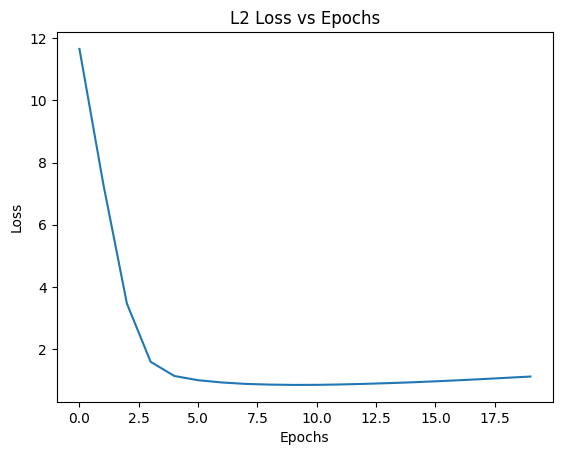

In [46]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt   # <<< added

np.random.seed(42)

# ---------- Load MNIST ----------
(X,Y),(Xt,Yt)=mnist.load_data()
X=X.reshape(-1,784)/255.0

# Small dataset
X=X[:100]
Y=Y[:100]

# One-hot
def onehot(y):
    o=np.zeros((y.size,10))
    o[np.arange(y.size),y]=1
    return o

Y_oh=onehot(Y)

# ---------- Network ----------
layers=3
sizes=[784,512,64,10]

weights=[]
biases=[]

for i in range(layers):
    weights.append(np.random.randn(sizes[i],sizes[i+1])*0.2)
    biases.append(np.zeros((1,sizes[i+1])))

# L2 strength
l2_lambda=0.5

# ---------- Functions ----------
def relu(x): return np.maximum(0,x)

def softmax(x):
    e=np.exp(x-np.max(x,axis=1,keepdims=True))
    return e/np.sum(e,axis=1,keepdims=True)

def loss(y,yh):  # <<< added
    return -np.mean(np.sum(y*np.log(yh+1e-8),axis=1))

# ---------- Forward ----------
def forward(x):
    acts=[x]; pre=[]
    for i in range(layers):
        z=acts[-1]@weights[i]+biases[i]
        pre.append(z)
        acts.append(softmax(z) if i==layers-1 else relu(z))
    return acts,pre

# ---------- Backward ----------
def backward(acts,pre,y):
    gw=[]; gb=[]
    dz=acts[-1]-y

    for i in reversed(range(layers)):
        dw=(acts[i].T@dz)/acts[i].shape[0] + l2_lambda*weights[i]
        db=dz.mean(0,keepdims=True)

        gw.insert(0,dw)
        gb.insert(0,db)

        if i>0:
            dz=(dz@weights[i].T)*(pre[i-1]>0)

    return gw,gb

# ---------- Graph storage (added) ----------
acc_list=[]
loss_list=[]

# ---------- Train ----------
def train(ep=20,lr=0.1):
    for e in range(ep):
        acts,pre=forward(X)
        gw,gb=backward(acts,pre,Y_oh)

        for i in range(layers):
            weights[i]-=lr*gw[i]
            biases[i]-=lr*gb[i]

        pred=np.argmax(acts[-1],1)
        acc=(pred==Y).mean()*100

        acc_list.append(acc)                  # <<< added
        loss_list.append(loss(Y_oh,acts[-1])) # <<< added

train()

# ---------- Final Accuracy ----------
acts,_=forward(X)
pred=np.argmax(acts[-1],1)
acc=(pred==Y).mean()*100

print("\nFinal Training Accuracy:",acc,"%")

# ---------- Graphs (added) ----------
plt.plot(acc_list)
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("L2 Accuracy vs Epochs")
plt.show()

plt.plot(loss_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("L2 Loss vs Epochs")
plt.show()


**DROPOUT REGULARIZATION**


Final Training Accuracy: 76.0 %


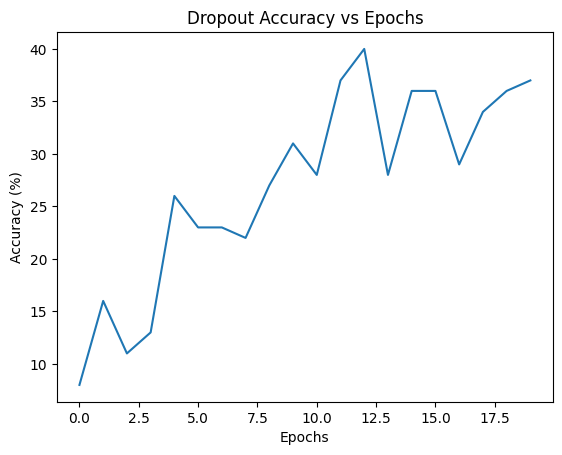

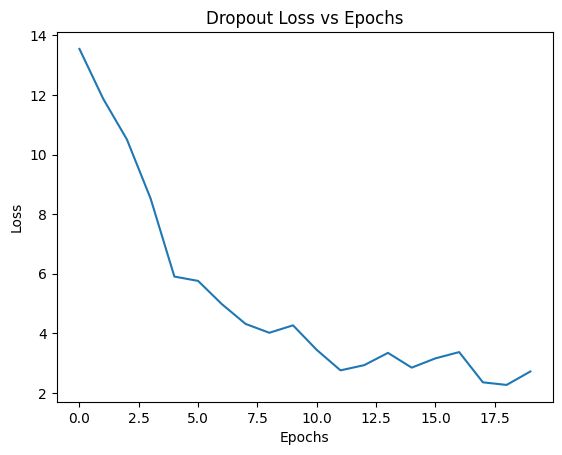

In [49]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt   # <<< added

np.random.seed(42)

# ---------- Load MNIST ----------
(X,Y),(Xt,Yt)=mnist.load_data()
X=X.reshape(-1,784)/255.0

# Small dataset → overfitting demo
X=X[:100]
Y=Y[:100]

# One-hot
def onehot(y):
    o=np.zeros((y.size,10))
    o[np.arange(y.size),y]=1
    return o

Y_oh=onehot(Y)

# ---------- Network ----------
layers=3
sizes=[784,512,64,10]

weights=[]
biases=[]

for i in range(layers):
    weights.append(np.random.randn(sizes[i],sizes[i+1])*0.2)
    biases.append(np.zeros((1,sizes[i+1])))

# Dropout rate
drop_rate=0.3

# ---------- Functions ----------
def relu(x): return np.maximum(0,x)

def softmax(x):
    e=np.exp(x-np.max(x,axis=1,keepdims=True))
    return e/np.sum(e,axis=1,keepdims=True)

def loss(y,yh):   # <<< added
    return -np.mean(np.sum(y*np.log(yh+1e-8),axis=1))

# ---------- Forward ----------
def forward(x,train=True):
    acts=[x]; pre=[]; masks=[]

    for i in range(layers):
        z=acts[-1]@weights[i]+biases[i]
        pre.append(z)

        if i==layers-1:
            a=softmax(z)
            masks.append(1)
        else:
            a=relu(z)

            if train:
                m=(np.random.rand(*a.shape)>drop_rate)
                a=a*m/(1-drop_rate)
            else:
                m=1

            masks.append(m)

        acts.append(a)

    return acts,pre,masks

# ---------- Backward ----------
def backward(acts,pre,masks,y):
    gw=[]; gb=[]
    dz=acts[-1]-y

    for i in reversed(range(layers)):
        dw=acts[i].T@dz/acts[i].shape[0]
        db=dz.mean(0,keepdims=True)

        gw.insert(0,dw)
        gb.insert(0,db)

        if i>0:
            dz=(dz@weights[i].T)*(pre[i-1]>0)*masks[i-1]

    return gw,gb

# ---------- Graph storage (added) ----------
acc_list=[]
loss_list=[]

# ---------- Train ----------
def train(ep=20,lr=0.1):
    for e in range(ep):
        acts,pre,masks=forward(X,True)
        gw,gb=backward(acts,pre,masks,Y_oh)

        for i in range(layers):
            weights[i]-=lr*gw[i]
            biases[i]-=lr*gb[i]

        pred=np.argmax(acts[-1],1)
        acc=(pred==Y).mean()*100

        acc_list.append(acc)                  # <<< added
        loss_list.append(loss(Y_oh,acts[-1])) # <<< added

train()

# ---------- Final Accuracy ----------
acts,_,_=forward(X,False)
pred=np.argmax(acts[-1],1)
acc=(pred==Y).mean()*100

print("\nFinal Training Accuracy:",acc,"%")

# ---------- Graphs (added) ----------
plt.plot(acc_list)
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Dropout Accuracy vs Epochs")
plt.show()

plt.plot(loss_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Dropout Loss vs Epochs")
plt.show()
